In [ ]:
!pip install vbeam

# `vbeam.util.geometry.v2` is a WIP module for working with geometry
Expect some things to be broken and an inconsistent API.

# Lines

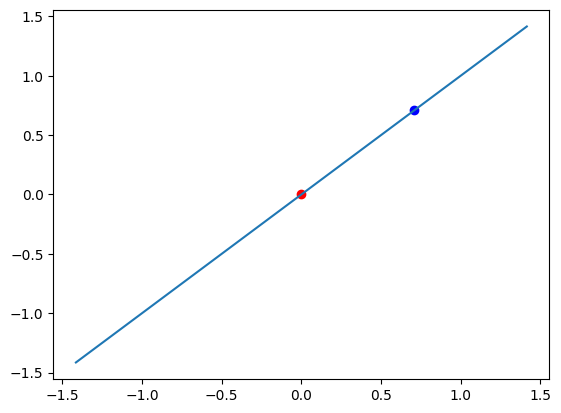

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from vbeam.util.geometry.v2 import Line

# A line that goes through origo and has a slope of 1
line = Line(jnp.array([0, 0]), jnp.array([1, 1]))

# We can get points on the line by evaluating it with a parameter
# Evaluating it at 0 gives the anchor point — in this case it's origo
plt.scatter(*line(0), color="red")
# The distance from a point at line(t) to a point at line(t+1) is always 1, i.e. the
# tangent is normalized.
plt.scatter(*line(1), color="blue")

# We can also evaluate many points at once in order to plot the line
t = jnp.linspace(-2, 2, 100)
plt.plot(*line(t))

# Note that lines extend infinitely, even though we only plot a segment of it below.

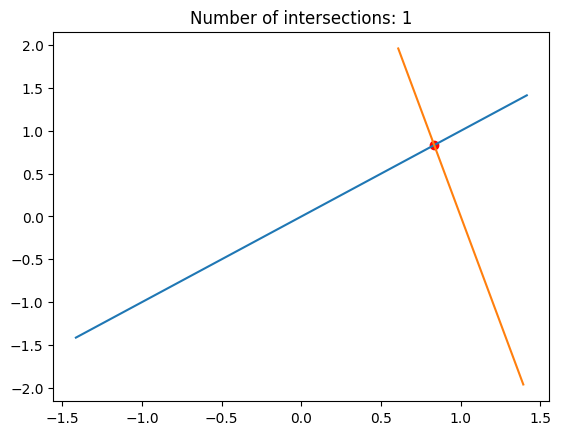

In [2]:
line2 = Line(jnp.array([1, 0]), jnp.array([-1, 5]))

# We can get the intersection of two lines
num_intersections, intersections = line.intersect(line2)

plt.title(f"Number of intersections: {num_intersections}")
plt.plot(*line(t))
plt.plot(*line2(t))
plt.scatter(*intersections, color="red")


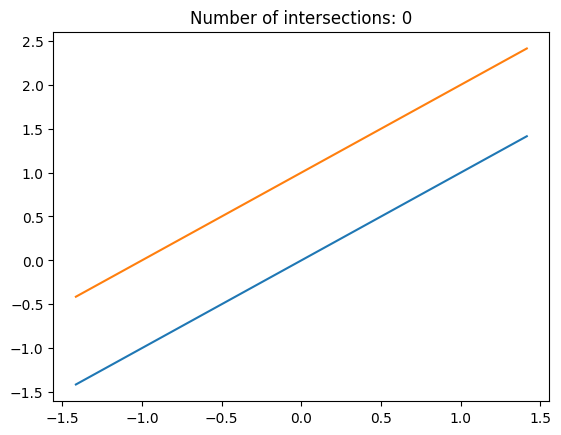

In [3]:
# Lines that are parallel don't intersect
line3 = Line(jnp.array([0, 1]), jnp.array([1,1]))
num_intersections, intersections = line.intersect(line3)

plt.title(f"Number of intersections: {num_intersections}")
plt.plot(*line(t))
plt.plot(*line3(t))
plt.scatter(*intersections, color="red")

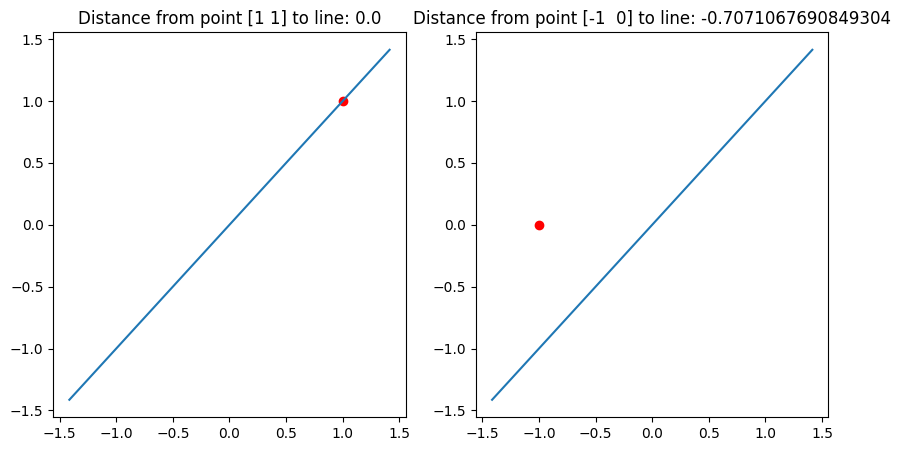

In [4]:
# We can calculate the signed distance from a point to a line
point1 = jnp.array([1, 1])
point2 = jnp.array([-1, 0])
distance1 = line.signed_distance(point1)
distance2 = line.signed_distance(point2)
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].set_title(f"Distance from point {point1} to line: {distance1}")
ax[0].plot(*line(t))
ax[0].scatter(*point1, color="red")
ax[1].set_title(f"Distance from point {point2} to line: {distance2}")
ax[1].plot(*line(t))
ax[1].scatter(*point2, color="red")

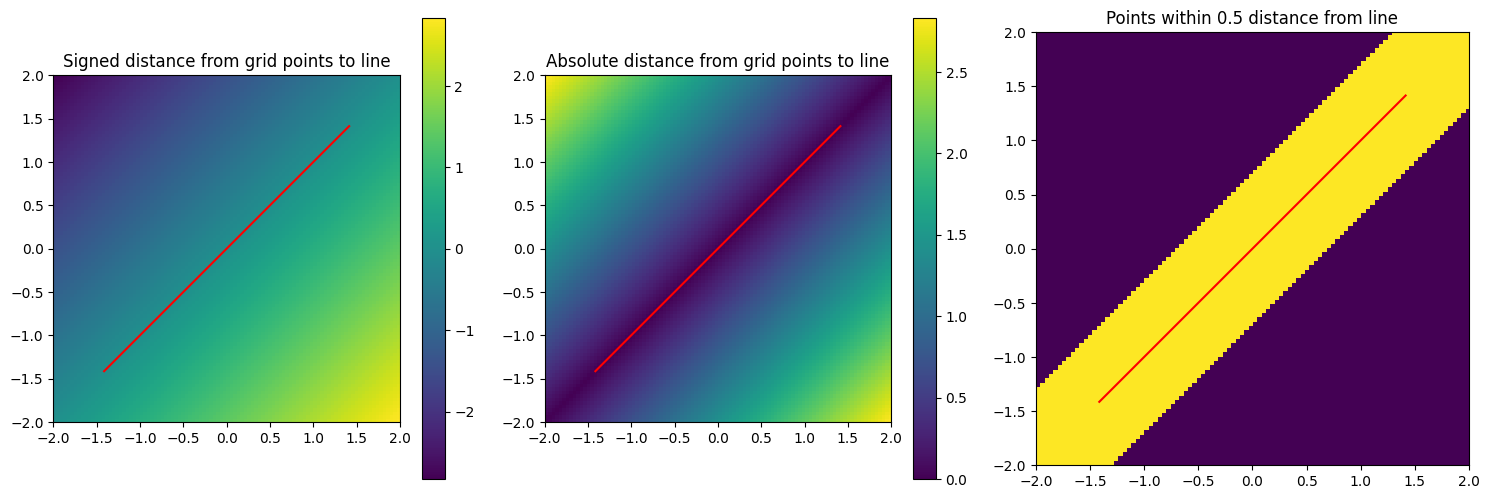

In [5]:
# We can get the distances from all the points in a grid to the line
grid = jnp.stack(jnp.meshgrid(jnp.linspace(-2, 2, 100), jnp.linspace(-2, 2, 100)), axis=-1)
distances = line.signed_distance(grid)
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
im1 = ax[0].imshow(distances, origin="lower", extent=(-2, 2, -2, 2))
ax[0].set_title("Signed distance from grid points to line")
ax[0].plot(*line(t), color="red")
fig.colorbar(im1, ax=ax[0])

# We can get just "regular" distances by taking the absolute value of the signed distances
im2 = ax[1].imshow(jnp.abs(distances), origin="lower", extent=(-2, 2, -2, 2))
ax[1].set_title("Absolute distance from grid points to line")
ax[1].plot(*line(t), color="red")
fig.colorbar(im2, ax=ax[1])

# We can also easily get a boolean mask of points that are within a certain distance from the line
ax[2].imshow(jnp.abs(distances)<0.5, origin="lower", extent=(-2, 2, -2, 2))
ax[2].set_title("Points within 0.5 distance from line")
ax[2].plot(*line(t), color="red")
fig.tight_layout()

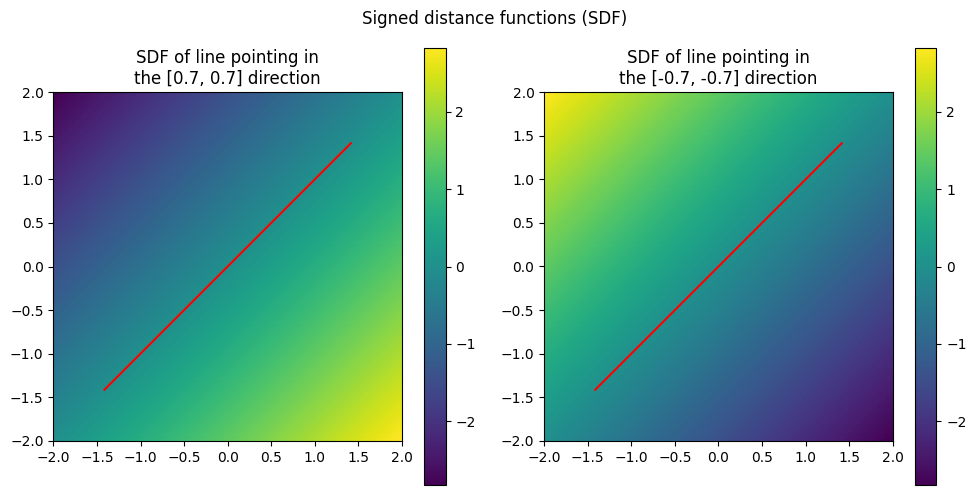

In [6]:
# Note the convention for the sign of the distance:
# - It's POSITIVE if the point is on the "right" side of the line
# - It's NEGATIVE if the point is on the "left" side of the line
# with "left" and "right" being relative to the direction of the line. This particular 
# line points in the [1, 1] direction. If it pointed in the [-1, -1] direction instead,
# the set of points defined by the line would be the same, but the sign of the distance
# would be flipped.

line = Line(jnp.array([0, 0]), jnp.array([1, 1]))
flipped_line = Line(jnp.array([0, 0]), jnp.array([-1, -1]))
flipped_line_distances = flipped_line.signed_distance(grid)
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
im1 = ax[0].imshow(distances, origin="lower", extent=(-2, 2, -2, 2))
ax[0].set_title(
    f"SDF of line pointing in\nthe [{line.direction[0]:.1f}, {line.direction[1]:.1f}] direction"
)
ax[0].plot(*line(t), color="red")
fig.colorbar(im1, ax=ax[0])
im2 = ax[1].imshow(flipped_line_distances, origin="lower", extent=(-2, 2, -2, 2))
ax[1].set_title(
    f"SDF of line pointing in\nthe [{flipped_line.direction[0]:.1f}, {flipped_line.direction[1]:.1f}] direction"
)
ax[1].plot(*flipped_line(t), color="red")
fig.suptitle("Signed distance functions (SDF)")
fig.colorbar(im2, ax=ax[1])
fig.tight_layout()


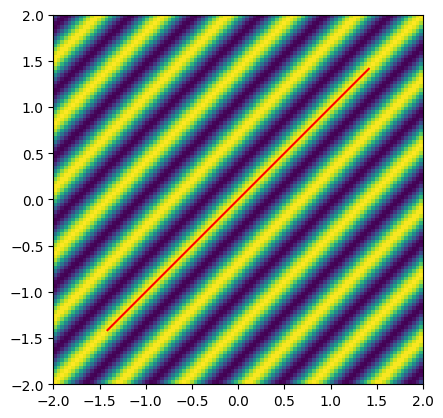

In [7]:
# The signed distance function is normalized, meaning that we get nice linear gradients.
plt.imshow(jnp.cos(distances * jnp.pi * 4), origin="lower", extent=(-2, 2, -2, 2))
plt.plot(*line(t), color="red")


# Circles

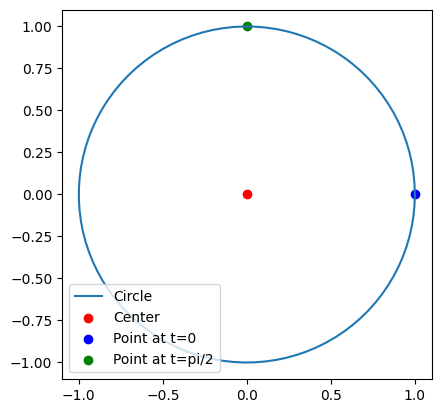

In [8]:
from vbeam.util.geometry.v2 import Circle

# A unit circle centered at origo
circle = Circle(jnp.array([0, 0]), 1)

# A whole circle needs parameters in the range [0, 2*pi]
t = jnp.linspace(0, 2*jnp.pi, 100)

# Let's plot the circle and some points on it
plt.plot(*circle(t))
plt.scatter(*circle.center, color="red")
plt.scatter(*circle(0), color="blue")
plt.scatter(*circle(jnp.pi/2), color="green")
plt.legend(["Circle", "Center", "Point at t=0", "Point at t=pi/2"], loc="lower left")
plt.gca().set_aspect("equal")



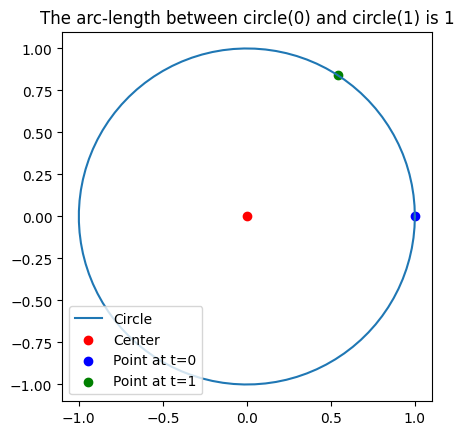

In [9]:
# Similar to how the distance from the point on a line at t=0 to one at t=1 is 1, the 
# arc-length distance between two points at t=0 and t=1 on a circle is also 1.
plt.plot(*circle(t))
plt.scatter(*circle.center, color="red")
plt.scatter(*circle(0), color="blue")
plt.scatter(*circle(1), color="green")
plt.title("The arc-length between circle(0) and circle(1) is 1")
plt.legend(["Circle", "Center", "Point at t=0", "Point at t=1"], loc="lower left")
plt.gca().set_aspect("equal")



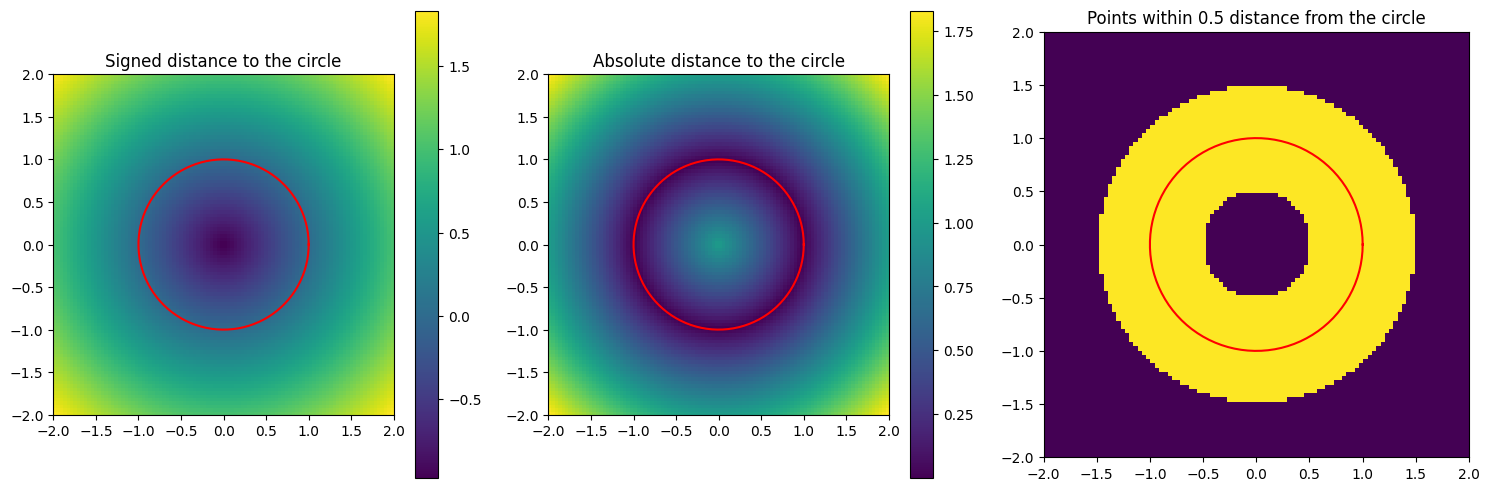

In [10]:
# As with lines, we can calculate the signed distance from a set of points to a circle
# For circles, the boundary is always defined as going counter-clockwise, so the sign of
# the signed distance is positive on the outside of the circle and negative on the 
# inside.
grid = jnp.stack(jnp.meshgrid(jnp.linspace(-2, 2, 100), jnp.linspace(-2, 2, 100)), axis=-1)
distances = circle.signed_distance(grid)
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
im1 = ax[0].imshow(distances, origin="lower", extent=(-2, 2, -2, 2))
ax[0].set_title("Signed distance to the circle")
ax[0].plot(*circle(t), color="red")
fig.colorbar(im1, ax=ax[0])

# We can get just "regular" distances by taking the absolute value of the signed distances
im2 = ax[1].imshow(jnp.abs(distances), origin="lower", extent=(-2, 2, -2, 2))
ax[1].set_title("Absolute distance to the circle")
ax[1].plot(*circle(t), color="red")
fig.colorbar(im2, ax=ax[1])

# We can also easily get a boolean mask of points that are within a certain distance from the circle
ax[2].imshow(jnp.abs(distances)<0.5, origin="lower", extent=(-2, 2, -2, 2))
ax[2].set_title("Points within 0.5 distance from the circle")
ax[2].plot(*circle(t), color="red")
fig.tight_layout()


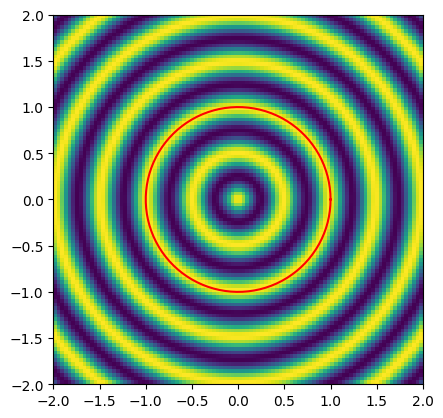

In [11]:
# The signed distance function is normalized, meaning that we get nice linear gradients.
plt.imshow(jnp.cos(distances * jnp.pi * 4), origin="lower", extent=(-2, 2, -2, 2))
plt.plot(*circle(t), color="red")

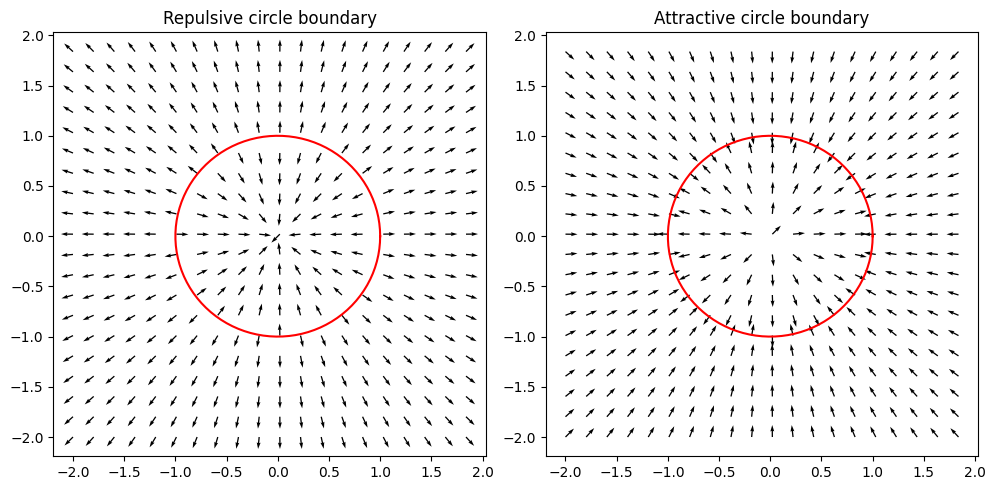

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
flattened_grid = grid[::5, ::5, :].reshape((20 * 20, 2))

# By differentiating the absolute distance from the circle we get a vector field where
# points are repelled away from the circle.
absolute_distance = lambda *args: jnp.abs(circle.signed_distance(*args))
repulsive_field = jax.vmap(jax.jacfwd(absolute_distance), out_axes=1)  # jacfwd = jacobian of forward pass
ax[0].quiver(*flattened_grid.T, *repulsive_field(flattened_grid))
ax[0].plot(*circle(t), color="red")
ax[0].set_title("Repulsive circle boundary")

# By differentiating the negative absolute distance from the circle we get a vector 
# field where points are attracted towards the circle.
absolute_negative_distance = lambda *args: -jnp.abs(circle.signed_distance(*args))
attractive_field = jax.vmap(jax.jacfwd(absolute_negative_distance), out_axes=1)  # jacfwd = jacobian of forward pass
ax[1].quiver(*flattened_grid.T, *attractive_field(flattened_grid))
ax[1].plot(*circle(t), color="red")
ax[1].set_title("Attractive circle boundary")
fig.tight_layout()


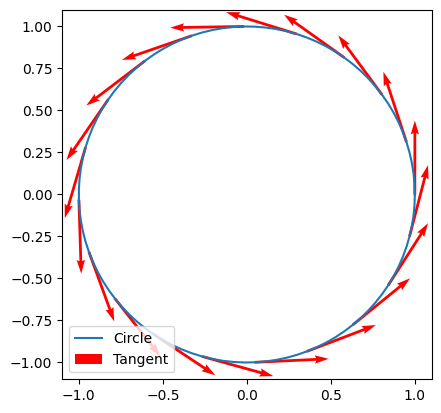

In [13]:
# By differentiating the curve itself we get its tangent
tangent = jax.vmap(jax.jacfwd(circle), out_axes=1)  # jacfwd = jacobian of forward pass
plt.plot(*circle(t))
plt.quiver(*circle(t[::5]), *tangent(t[::5]), scale=5, color="red")
plt.legend(["Circle", "Tangent"], loc="lower left")
plt.gca().set_aspect("equal")


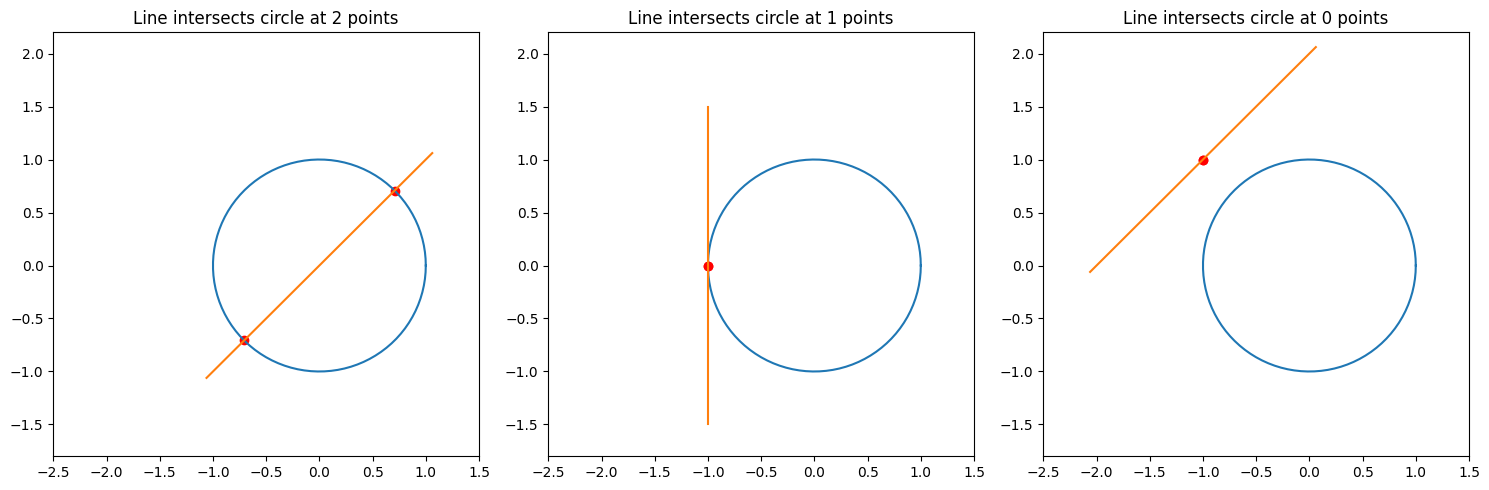

In [14]:
# We can intersect lines and circles

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
for i, line in enumerate(
    [
        Line(jnp.array([0, 0]), jnp.array([1, 1])),
        Line(jnp.array([-1, 0]), jnp.array([0, 1])),
        Line(jnp.array([-1, 1]), jnp.array([1, 1])),
    ]
):
    num_intersections, intersection_points = circle.intersect(line)
    ax[i].plot(*circle(t))
    ax[i].plot(*line(jnp.linspace(-1.5, 1.5)))
    ax[i].scatter(*intersection_points.real, color="red")
    ax[i].set_title(f"Line intersects circle at {num_intersections} points")
    ax[i].set_xlim([-2.5, 1.5])
    ax[i].set_ylim([-1.8, 2.2])
fig.tight_layout()


# Ellipses

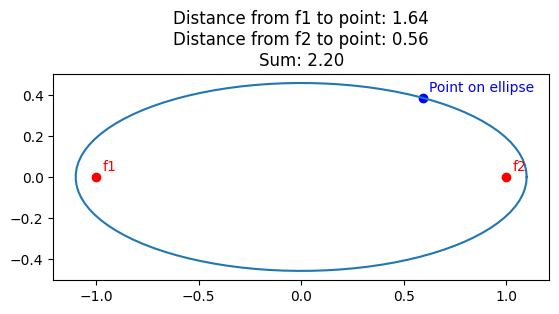

In [15]:
from vbeam.util.geometry.v2 import Ellipse

# Ellipses are defined by two focus points f1 and f2 and a summed distance d.
# The points on the ellipse are the points where the distance from f1 and f2 to the 
# point sums to d.
ellipse_d = 2.20
ellipse = Ellipse(jnp.array([-1, 0]), jnp.array([1, 0]), ellipse_d)
p = ellipse(1)
f1_to_p_distance = jnp.linalg.norm(p - ellipse.f1)
f2_to_p_distance = jnp.linalg.norm(p - ellipse.f2)
plt.plot(*ellipse(t))
plt.scatter(*ellipse.f1, color="red")
plt.scatter(*ellipse.f2, color="red")
plt.scatter(*p, color="blue")
plt.text(*(ellipse.f1+0.03), "f1", color="red")
plt.text(*(ellipse.f2+0.03), "f2", color="red")
plt.text(*(p+0.03), "Point on ellipse", color="blue")
plt.title(f"Distance from f1 to point: {f1_to_p_distance:.2f}\nDistance from f2 to point: {f2_to_p_distance:.2f}\nSum: {f1_to_p_distance + f2_to_p_distance:.2f}")
plt.gca().set_aspect("equal")

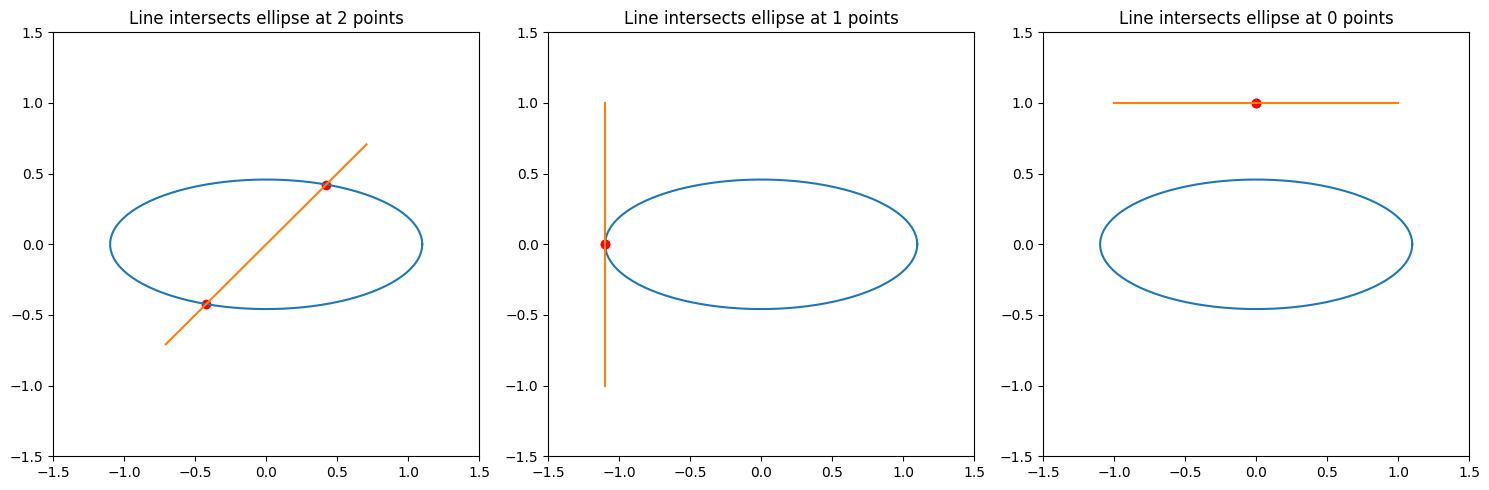

: 

In [16]:
# We can intersect ellipses and lines
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
for i, line in enumerate(
    [
        Line(jnp.array([0, 0]), jnp.array([1, 1])),
        Line(jnp.array([ellipse(jnp.pi)[0], 0]), jnp.array([0, 1])),
        Line(jnp.array([0, 1]), jnp.array([1, 0])),
    ]
):
    num_intersections, intersection_points = ellipse.intersect(line)
    ax[i].plot(*ellipse(t))
    ax[i].plot(*line(jnp.linspace(-1, 1)))
    ax[i].scatter(*intersection_points.real, color="red")
    ax[i].set_title(f"Line intersects ellipse at {num_intersections} points")
    ax[i].set_xlim([-1.5, 1.5])
    ax[i].set_ylim([-1.5, 1.5])
fig.tight_layout()


### *Ellipses are the least finished class of the three, so expect some things to be broken. In particular, ellipses are evaluated as transformed unit circles, which in turn means that the whole space is transformed. This breaks gradients and makes the tangent not be arc-length normalized.*